# Task 2 : Prediction Using Unupervised ML

## We have to predict the optimum number of cluster and represent it visually

#### Autor : Shaluka Sinha

In [24]:
# Import warnings
import warnings
warnings.filterwarnings('ignore')

In [25]:
# Import the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Importing and Understanding the Data

In [26]:
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [27]:
df.shape

(150, 6)

In [28]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [30]:
# missing values
round(100*(df.isnull().sum())/len(df), 2)

Id               0.0
SepalLengthCm    0.0
SepalWidthCm     0.0
PetalLengthCm    0.0
PetalWidthCm     0.0
Species          0.0
dtype: float64

### Data Vizualization

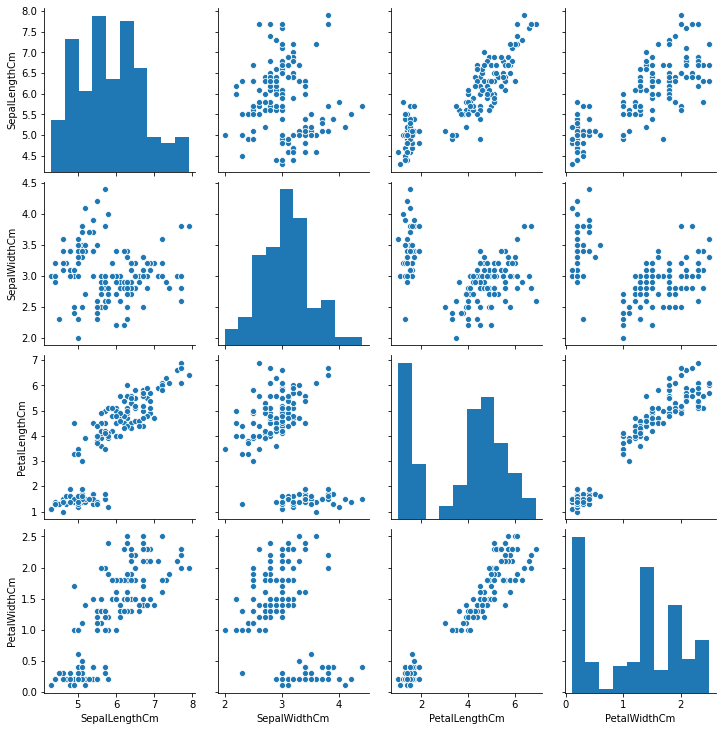

In [31]:
#Bivariate analysis
sns.pairplot(df[df.columns[1:5]])
plt.show()

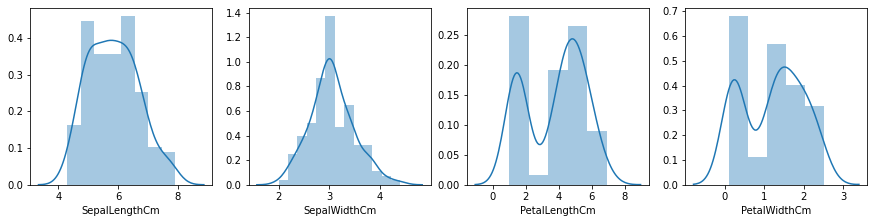

In [32]:
# Univariate Analysis
f = df[df.columns[1:5]]
plt.figure(figsize = (15,15))
for i in enumerate(f):
    plt.subplot(4,4,i[0]+1)
    sns.distplot(df[i[1]])

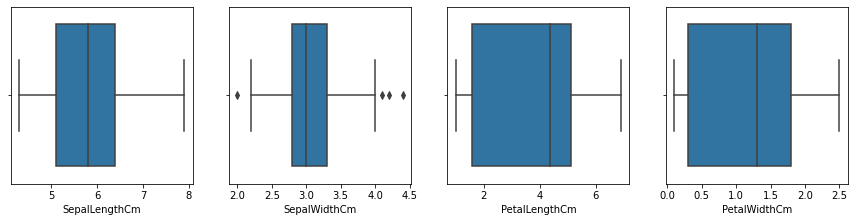

In [33]:
#check the outliers
f = df[df.columns[1:5]]
plt.figure(figsize = (15,15))
for i in enumerate(f):
    plt.subplot(4,4,i[0]+1)
    sns.boxplot(x = i[1], data = df)

In [34]:
#Code for outlier treatment
# For SepalWidth column
q1 = df['SepalWidthCm'].quantile(0.999)
df['SepalWidthCm'][df['SepalWidthCm']>=q1]= q1


### Feature Scaling

We must perform scaling to our dataset before any modeling techniques as this will make all the data at same scale. And it is more important particulary in clustering as unscaled data points may joins another cluster

In [35]:
#apply Standardization for Scaling
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
df1 = ss.fit_transform(df.drop(['Species','Id'], axis = 1))
df1

array([[-9.00681170e-01,  1.03398225e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00, -1.24674562e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.38535265e+00,  3.38788161e-01, -1.39813811e+00,
        -1.31297673e+00],
       [-1.50652052e+00,  1.07056799e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.02184904e+00,  1.26571361e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-5.37177559e-01,  1.96090769e+00, -1.17067529e+00,
        -1.05003079e+00],
       [-1.50652052e+00,  8.02250884e-01, -1.34127240e+00,
        -1.18150376e+00],
       [-1.02184904e+00,  8.02250884e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.74885626e+00, -3.56405924e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00,  1.07056799e-01, -1.28440670e+00,
        -1.44444970e+00],
       [-5.37177559e-01,  1.49744497e+00, -1.28440670e+00,
        -1.31297673e+00],
       [-1.26418478e+00,  8.02250884e-01, -1.22754100e+00,
      

In [46]:
# Check the scaled data in Dataframe
df1 = pd.DataFrame(df1)
df1.columns = df.columns[1:5]
df1

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,-0.900681,1.033982,-1.341272,-1.312977
1,-1.143017,-0.124675,-1.341272,-1.312977
2,-1.385353,0.338788,-1.398138,-1.312977
3,-1.506521,0.107057,-1.284407,-1.312977
4,-1.021849,1.265714,-1.341272,-1.312977
...,...,...,...,...
145,1.038005,-0.124675,0.819624,1.447956
146,0.553333,-1.283331,0.705893,0.922064
147,0.795669,-0.124675,0.819624,1.053537
148,0.432165,0.802251,0.933356,1.447956


### Cluster Formation by K-Mean Clustering

**In KMeans Clustering,here we will use Silhoutte Analysis and Elbow Curve Method to determine the k.**

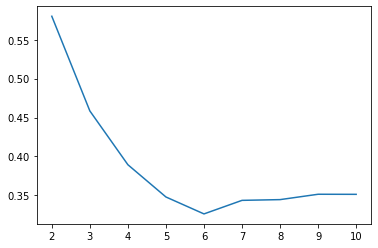

In [37]:
# Silhouette Analysis
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
ss = []
for k in range(2,11):
    kmean = KMeans(n_clusters = k).fit(df1)
    ss.append([k, silhouette_score(df1, kmean.labels_)])

sil =pd.DataFrame(ss)
plt.plot(sil[0], sil[1])

Higher silhouette score is consider as better so, from here we can determine k = 3

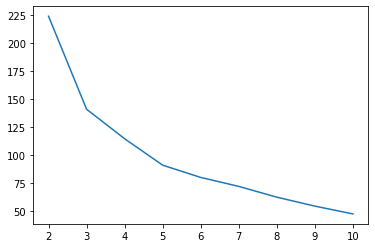

In [38]:
## Elbow Curve
ssd = []
for k in range(2,11):
    kmean = KMeans(n_clusters = k).fit(df1)
    ssd.append([k, kmean.inertia_])
    
ssd = pd.DataFrame(ssd)
plt.plot(ssd[0], ssd[1])

- In Elbow Curve, that number of cluster is considered where there is no significant change is observed.

So, by both the analysis we came to our conclusion of k as the value of 3. 

#### K Mean with K=3

In [47]:
# Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(df1)

In [41]:
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

In [48]:
df1['cluster_id'] = y_kmeans

In [44]:
x = df1.values

### Visualizing the Cluster

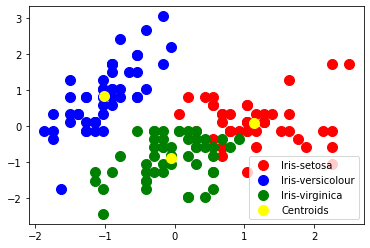

In [45]:
# Visualising the clusters - On the first two columns
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

### Some more cluster visualiztion

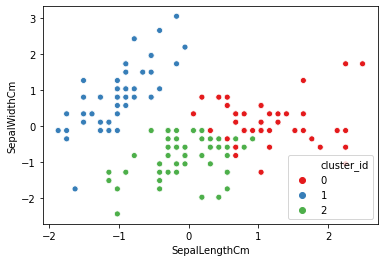

In [20]:
sns.scatterplot(x = 'SepalLengthCm', y = 'SepalWidthCm', hue = 'cluster_id', data = df1, palette ='Set1')

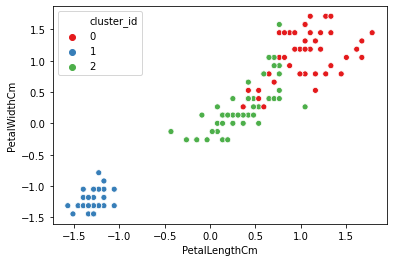

In [21]:
sns.scatterplot(x = 'PetalLengthCm', y = 'PetalWidthCm', hue = 'cluster_id', data = df1, palette ='Set1')